# Домашее задание №5

В файле advertising.csv содержаться данные о клиентах интернет-магазина.

Набор данных содержит следующие переменные:

    'Daily Time Spent on Site': consumer time on site in minutes
    'Age': cutomer age in years
    'Area Income': Avg. Income of geographical area of consumer
    'Daily Internet Usage': Avg. minutes a day consumer is on the internet
    'Ad Topic Line': Headline of the advertisement
    'City': City of consumer
    'Male': Whether or not consumer was male
    'Country': Country of consumer
    'Timestamp': Time at which consumer clicked on Ad or closed window
    'Clicked on Ad': 0 or 1 indicated clicking on Ad


Задача - создать модель, которая будет предсказывать, нажмет ли интернет-пользователь на рекламу, на основе характеристик этого пользователя. 

Задания:

    •	Сформулируйте гипотезы исследования.
    •	Постройте модель бинарной логистической регрессии. Зависимая переменная - 'Clicked on Ad'. В качестве предикторов выберите не менее 3 метрических переменных и не менее 2 категориальных переменных.
    •	Напишите уравнение регрессии (линейная часть). Оцените характеристики регрессионной модели. Оцените статическую значимость и предсказательную силу модели.
    •	Оцените значимость регрессионных коэффициентов. Подробно интерпретируйте особенности взаимосвязи между каждым из предикторов и зависимой переменной.
    •	Проведите диагностику модели (проверьте остатки на нормальность, оцените мультиколлинартность). 
    •	Осуществите кросс-валидацию и опишите ее результаты.
    •	Сформулируйте общие содержательные выводы по результатам регрессионного анализа данных. Какие результаты анализа данных для вас оказались очевидными, а какие неожиданными?

In [629]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [630]:
df = pd.read_csv("advertising.csv")
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [631]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [632]:
# Распарсим Timestamp и добавим столбцы с месяцем и часом, когда кликали на рекламу

import datetime

def hour(date_time_str):
    datetime_format = '%Y-%m-%d %H:%M:%S'
    dt = datetime.datetime.strptime(date_time_str, datetime_format)
    
    return dt.hour

def month(date_time_str):
    datetime_format = '%Y-%m-%d %H:%M:%S'
    dt = datetime.datetime.strptime(date_time_str, datetime_format)
    
    return dt.month


df['Hour'] = df['Timestamp'].apply(hour)
df['Month'] = df['Timestamp'].apply(month)
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Hour,Month
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0,3
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,1,4
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,20,3
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2,1
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,21,2
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,2,4
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,17,2
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,2,3


In [633]:
# Будем измерять доход не в единицах (не знаю каких, источник не дали), а в тысячах

df['Area Income Thousands'] = df['Area Income'].apply(lambda x : 0.001*x)
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Hour,Month,Area Income Thousands
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0,3,61.83390
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,1,4,68.44185
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,20,3,59.78594
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2,1,54.80618
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,3,6,73.88999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,21,2,71.38457
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,2,4,67.78217
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,17,2,42.41572
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,2,3,41.92079


In [634]:
# Пропусков нет, все показатели Non-Null 

# Названия переменных по типам данных
for t in df.dtypes.unique():
     print('Type: {}\n{}\n'.format(t, df.dtypes[df.dtypes==t].index.values))

Type: float64
['Daily Time Spent on Site' 'Area Income' 'Daily Internet Usage'
 'Area Income Thousands']

Type: int64
['Age' 'Male' 'Clicked on Ad' 'Hour' 'Month']

Type: object
['Ad Topic Line' 'City' 'Country' 'Timestamp']



### Зависимая переменная

In [635]:
dependent = "Clicked on Ad"
df[dependent].value_counts()

Clicked on Ad
0    500
1    500
Name: count, dtype: int64

### Предварительный анализ взаимосвязи зависимой переменной и предикторов

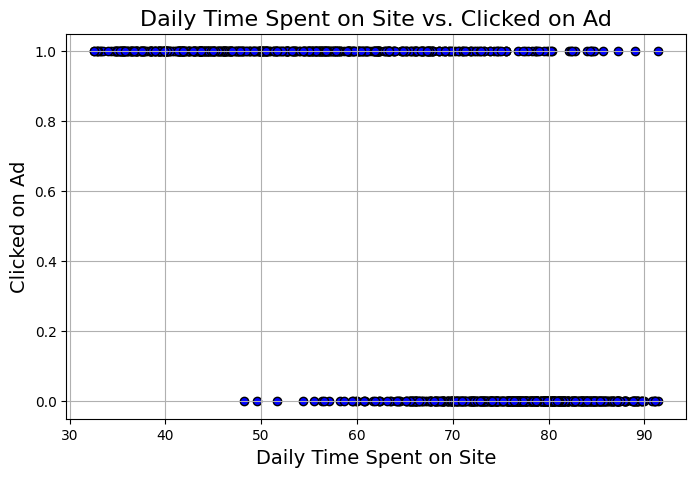

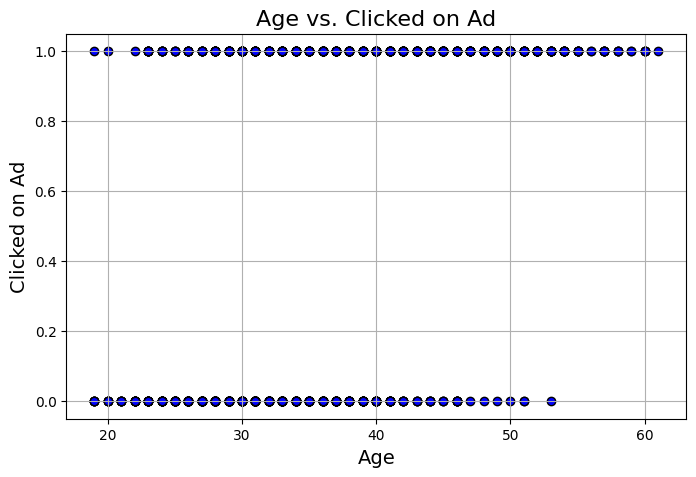

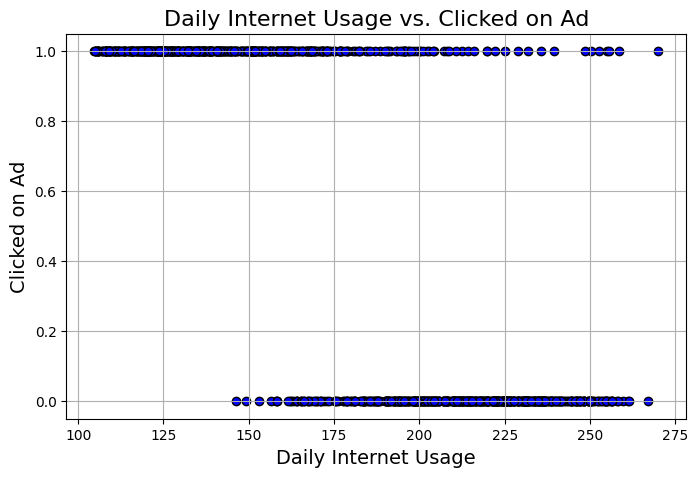

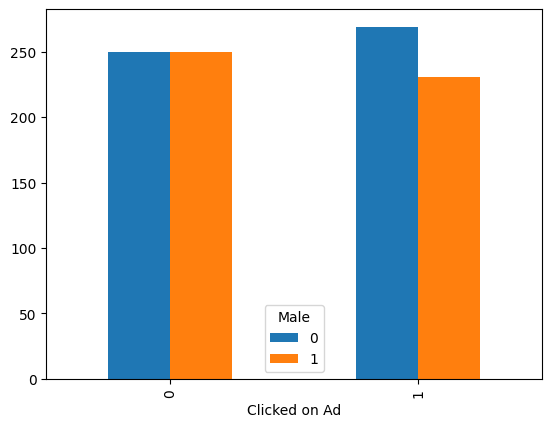

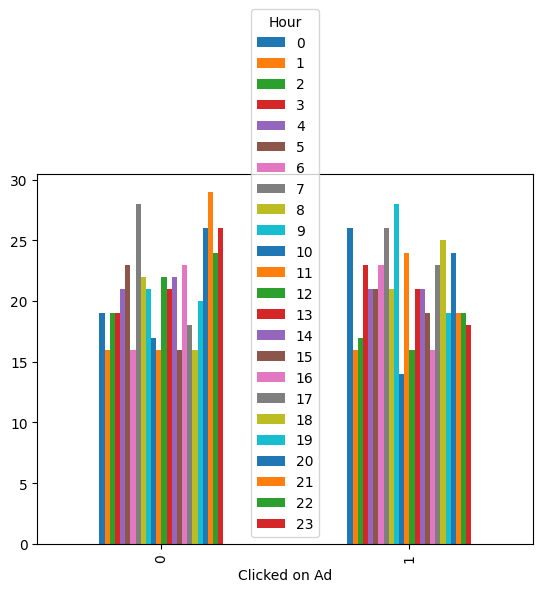

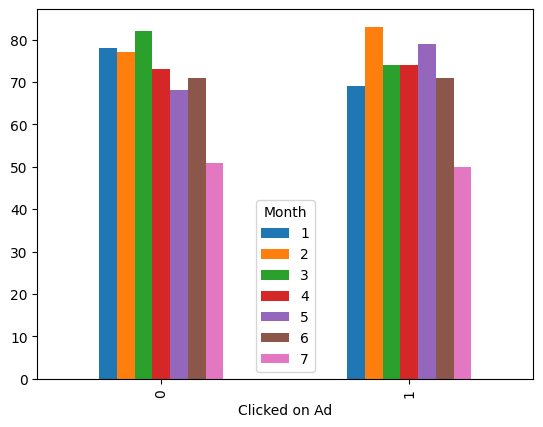

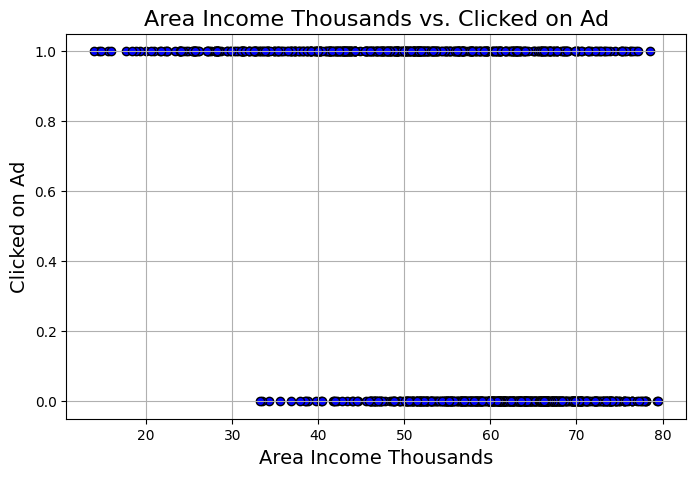

In [636]:
# Категориальные Country, City и Ad Topic Line, Timestamp не рассматриваем:

# 'Ad Topic Line' это уникальный индекс,
# 'Country' и 'City' слишком много уникальных и по смыслу не подходит,
# 'Timestamp' вообще плохой

# Пробуем все метрические
numeric = ['Age', 'Area Income Thousands', 'Daily Time Spent on Site', 'Daily Internet Usage']

# Пробуем категориальные - пол, час и месяц
# (час и месяц категориальные, а не метрические, потому что показывают не количество (продолжительность), а сезон или время суток)
categorial = ['Male', 'Hour', 'Month']

# Выводим диаграммы
for c in df.columns:
    if c in numeric:
        plt.figure(figsize=(8,5))
        plt.title('{} vs. {}'.format(c, dependent), fontsize=16)
        plt.scatter(x=df[c], y=df[dependent], color='blue',edgecolor='k')
        plt.grid(True)
        plt.xlabel(c, fontsize=14)
        plt.ylabel(dependent, fontsize=14)
        plt.show()
    elif c in categorial:
        ct = pd.crosstab(df[dependent], df[c])
        ct.plot.bar()

## 1. Гипотеза исследования

Зная возрасти пол клиента, время которое он провёл на сайте, время которое он проводит ежедневно в интернете и средний доход в его географическом регионе, можно предсказывать, перейдёт ли он по рекламе, размещённой на сайте, с точностью > 95%

## 2. Модель бинарной логистической регрессии

In [637]:
# Пропусков изначально нет

independent = numeric + categorial

x_mult = df[independent]
y = df[dependent]

x_mult_constant = sm.add_constant(x_mult)

In [638]:
# Выводим линейную регрессию

model0 = sm.Logit(y, x_mult_constant).fit()
print(model0.summary())

Optimization terminated successfully.
         Current function value: 0.090845
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:          Clicked on Ad   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      992
Method:                           MLE   Df Model:                            7
Date:                Tue, 26 Nov 2024   Pseudo R-squ.:                  0.8689
Time:                        18:02:06   Log-Likelihood:                -90.845
converged:                       True   LL-Null:                       -693.15
Covariance Type:            nonrobust   LLR p-value:                7.132e-256
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       27.5379      2.817      9.777      0.000      22.01


- Все выбранные метрические предикторы статистически значимы : $P>|z| = 0.000$

- Все выбранные категориальный предикторы (Male, Month, Hour) статистически незначимы : $P>|z| > 0.3$ (вероятность ошибки больше 30%)

## 3. Характеристика модели и уравнение регрессии

### Характеристики

In [639]:
# Убираем категориальные и строим новую модель
independent = numeric
x_mult = df[independent]
x_mult_constant = sm.add_constant(x_mult)
model1 = sm.Logit(y, x_mult_constant).fit()

# model1 = model0


print('R^2 = {:f}'.format(model1.prsquared))
print('Model significance = {:f}'.format(model1.llr_pvalue))

Optimization terminated successfully.
         Current function value: 0.091452
         Iterations 10
R^2 = 0.868063
Model significance = 0.000000


Модель статистически значима и объясняет 86.8% изменчивости значений зависимой переменной

### Уравнение линейной регрессии

In [640]:
l = []
for (param, index) in zip(model1.params[1:], model1.params.index[1:]):
    l.append('{:.2f}*{}'.format(param, index))
    
print('logit(p) = {:2f} + {}'.format(model1.params[0], ' + '.join(l)))

logit(p) = 27.129065 + 0.17*Age + -0.14*Area Income Thousands + -0.19*Daily Time Spent on Site + -0.06*Daily Internet Usage


### Матрица ошибок

In [641]:
cm = model1.pred_table()
print('TP: {} | FN: {}\n-------------------\nFP: {}  | TN: {}'.format(cm[0,0], cm[0,1], cm[1,0], cm[1,1]))

TP: 489.0 | FN: 11.0
-------------------
FP: 20.0  | TN: 480.0


In [642]:
accuracy = (cm[0,0] + cm[1,1]) / sum(sum(cm))
print('Точность (процент верно предсказанных событий): = {}'.format(accuracy))

Точность (процент верно предсказанных событий): = 0.969


### ROC-curve

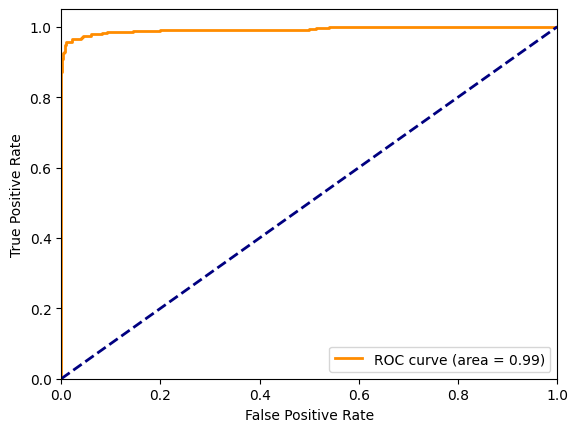

In [643]:
fpr, tpr, _ = roc_curve(df[dependent], model1.predict())
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

## 4. Регрессионные коэффициэнты

In [644]:
# Коэффициэнты регрессии

coefs = pd.DataFrame()
coefs['Coefs'] = model1.params[1:]
coefs['Features'] = model1.params.index[1:]
coefs.set_index('Features', inplace=True)
print('Intercept = ', model1.params[0])
coefs

Intercept =  27.129064910420553


,Coefs
Features,
Age,0.170921
Area Income Thousands,-0.135393
Daily Time Spent on Site,-0.191930
Daily Internet Usage,-0.063913


In [645]:
#коэффициенты регрессии и отношения шансов

coefs['OddsRatio'] = np.exp(coefs.Coefs)
coefs


,Coefs,OddsRatio
Features,,
Age,0.170921,1.186397
Area Income Thousands,-0.135393,0.873372
Daily Time Spent on Site,-0.191930,0.825365
Daily Internet Usage,-0.063913,0.938087


### Интерпретация коэффициэнтов регрессии

- Возраст, средний доход в географическом регионе, время проведенное на сайте, и среднее время проведённое в интернете статистически значимы и взаимосвязаны с зависимой переменной
- Увеличение возраста на год увеличивает шансы нажатия на рекламу на 18.6 %
- Увеличение среднего дохода в регионе на 1000 единиц снижает шансы нажатия на рекламу на 12.7%
- Увеличение времени проведённого на сайте на 1 минуту снижает шансы нажатия на рекламу на 17.5%
- Увеличение среднего времени, проведённого в интернете на 1 минуту, снижает шансы нажатия на рекламу на 6.2%

## 5. Диагностика модели

### Остатки

In [646]:
p = stats.kstest(model1.resid_generalized, 'norm', args=(model1.resid_generalized.mean(), model1.resid_generalized.std())).pvalue
print('P-value: {:.3f}'.format(p))

P-value: 0.000


<Axes: ylabel='Density'>

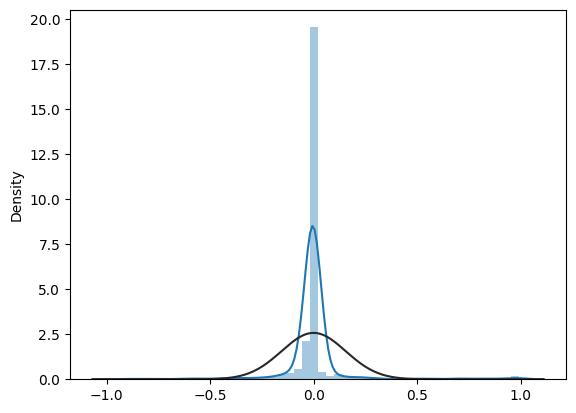

In [647]:
sns.distplot(model1.resid_generalized, fit=stats.norm) 

### Мультиколлинеарность

In [648]:
vifs = np.array([vif(model1.model.exog, i) for i in range(model1.model.exog.shape[1])])

vif_df = pd.DataFrame()
vif_df['VIF'] = vifs[1:]
vif_df['Features'] = model1.params.index[1:]
vif_df.sort_values(by=['VIF'])

,VIF,Features
1,1.163370,Area Income Thousands
0,1.195150,Age
2,1.449487,Daily Time Spent on Site
3,1.515086,Daily Internet Usage


Все значения VIF не превышают 2. Проблема мультиколлинеарности отсутствует

In [649]:
# Добавляем столбец с вероятностью 
df['probability'] = model1.predict()
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Hour,Month,Area Income Thousands,probability
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0,3,61.83390,0.007679
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,1,4,68.44185,0.009739
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,20,3,59.78594,0.006893
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2,1,54.80618,0.005058
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,3,6,73.88999,0.011744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,21,2,71.38457,0.008626
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,2,4,67.78217,0.999259
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,17,2,42.41572,0.999996
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,2,3,41.92079,0.883568


## 6. Кросс-валидация

In [650]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Делим 80% - обучающая выборка, 20% - тестовая выборка
X_train, X_test, y_train, y_test = train_test_split(x_mult, y, test_size=0.2, random_state=0)

In [651]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_train)

clf_report = pd.DataFrame(classification_report(y_train, pred,  output_dict=True))


print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

Train Result:
Accuracy Score: 96.88%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.962217    0.975186   0.96875    0.968701      0.968831
recall       0.974490    0.963235   0.96875    0.968863      0.968750
f1-score     0.968314    0.969174   0.96875    0.968744      0.968753
support    392.000000  408.000000   0.96875  800.000000    800.000000
_______________________________________________
Confusion Matrix: 
 [[382  10]
 [ 15 393]]



In [652]:
pred = lr.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))

print("Test Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

Test Result:
Accuracy Score: 98.00%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.972727   0.988889      0.98    0.980808      0.980162
recall       0.990741   0.967391      0.98    0.979066      0.980000
f1-score     0.981651   0.978022      0.98    0.979837      0.979982
support    108.000000  92.000000      0.98  200.000000    200.000000
_______________________________________________
Confusion Matrix: 
 [[107   1]
 [  3  89]]



## 7. Выводы

- Гипотеза оказалась верна: зная возраст пользователя, время проведённое им на сайте, средний доход в его географическом регионе и среднее время пользования интернетом, можно предсказать, перейдёт ли он по рекламе, размещённой на сайте, с высокой точностью в 98%

- Исследование показало, что более взрослые люди чаще переходят по рекламе

- Люди в более бедных регионах так же, более часто переходят по рекламе

- Неожиданным результатом было то, что время, проведённое на сайте и время, проводимое в интернете, негативно сказывается на шансах нажатия на рекламу

Обратите внимание, что все пункты задания должны сопровождаться _выполненным_ фрагментом кода!

# Этот файл нужно сохранить как Notebook (.ipynb) и загрузить в Smart LMS до 13:00 27 ноября.